# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2023

Мягкий дедлайн: 24.12.2023 23:59 MSK

Жёсткий дедлайн: 24.12.2023 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [2]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression


sns.set(style='darkgrid')
filterwarnings('ignore')

In [2]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [6]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 910 ms, sys: 7.28 ms, total: 917 ms
Wall time: 918 ms
Train ROC-AUC 0.9896
Valid ROC-AUC 0.9147
Test ROC-AUC 0.9152


## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

In [24]:
results = {}

depths = range(1, 30, 2)

train_scores = []
test_scores = []
for depth in depths:
    boosting = Boosting(base_model_params=dict(max_depth = depth))
    boosting.fit(x_train, y_train, x_valid, y_valid)
    train_scores.append(boosting.score(x_train, y_train))
    test_scores.append(boosting.score(x_test, y_test))

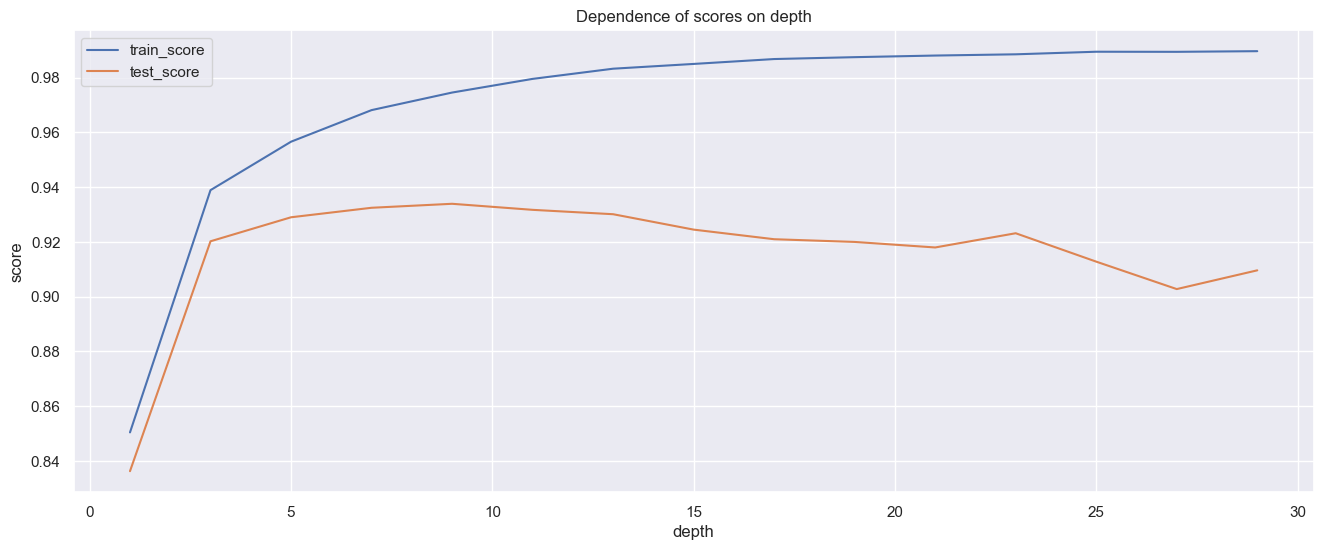

In [25]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(depths, train_scores, label = 'train_score')
ax.plot(depths, test_scores, label = 'test_score')
plt.title('Dependence of scores on depth')
plt.xlabel('depth')
plt.ylabel('score')
plt.legend()
plt.show()

In [26]:
print('наилучший скор на тесте показывает модель с глубиной:', depths[test_scores.index(max(test_scores))])

наилучший скор на тесте показывает модель с глубиной: 9


**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

Лучшее качество имеет модель, с умеренной глубиной, равной 9. Так как с увеличение глубины, увеличивается сложность базовых алгоритмов, что приводит к переобучению, но при этом слишком малые глубины не успевают уловить зависимость.

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

Будем перебирать следющие гиперпараметры используя библиотеку Optuna (она показалась намного понятнее Hyperopt)

Для базовых моделей:
- max_depth
- min_samples_split
- min_samples_leaf

Для ансамблирования:
- n_estimators
- n_estimators

In [109]:
import optuna

def objective(trial):
    model = Boosting(base_model_params={
        'max_depth': trial.suggest_int("max_depth", 1, 30, step=2),
        'min_samples_split':  trial.suggest_int("min_samples_split", 2, 50, step=2),
        'min_samples_leaf': trial.suggest_int("min_samples_leaf", 2, 50, step=2),
        },
        n_estimators=trial.suggest_int("n_estimators", 1, 150, step=2),
        lr=trial.suggest_float("learning_rate", 1e-4, 1e-1))
    model.fit(x_train, y_train, x_valid, y_valid)
    return model.score(x_valid, y_valid)

study = optuna.create_study(direction=optuna.study.StudyDirection.MAXIMIZE)
study.optimize(objective, n_trials=300, show_progress_bar=True)

[I 2023-12-22 12:15:59,252] A new study created in memory with name: no-name-541c7742-dc40-45e4-950d-499e03bad23b


  0%|          | 0/300 [00:00<?, ?it/s]

[I 2023-12-22 12:16:01,584] Trial 0 finished with value: 0.9377387089899453 and parameters: {'max_depth': 29, 'min_samples_split': 38, 'min_samples_leaf': 18, 'n_estimators': 37, 'learning_rate': 0.07123747145518623}. Best is trial 0 with value: 0.9377387089899453.
[I 2023-12-22 12:16:07,595] Trial 1 finished with value: 0.933019005725424 and parameters: {'max_depth': 15, 'min_samples_split': 16, 'min_samples_leaf': 44, 'n_estimators': 127, 'learning_rate': 0.01097680442915363}. Best is trial 0 with value: 0.9377387089899453.
[I 2023-12-22 12:16:14,727] Trial 2 finished with value: 0.9330900447226405 and parameters: {'max_depth': 27, 'min_samples_split': 10, 'min_samples_leaf': 46, 'n_estimators': 149, 'learning_rate': 0.0116254354348585}. Best is trial 0 with value: 0.9377387089899453.
[I 2023-12-22 12:16:16,041] Trial 3 finished with value: 0.8294820618550118 and parameters: {'max_depth': 1, 'min_samples_split': 36, 'min_samples_leaf': 10, 'n_estimators': 43, 'learning_rate': 0.00850

In [110]:
study.best_params

{'max_depth': 11,
 'min_samples_split': 30,
 'min_samples_leaf': 2,
 'n_estimators': 141,
 'learning_rate': 0.09313822625841761}

Оценим теперь качество модели с подобранными гиперпараметрами

In [79]:
boosting = Boosting(base_model_params = {'max_depth' : 11, 'min_samples_split' : 30, 'min_samples_leaf' : 2}, 
              learning_rate = 0.09313822625841761, n_estimators = 141)

boosting.fit(x_train, y_train, x_valid, y_valid)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

Train ROC-AUC 0.9824
Valid ROC-AUC 0.9398
Test ROC-AUC 0.9392


Можно заметить что качество такой модели на несколько процентов лучше дефолтной

## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

In [30]:
def plot_calibration_curve(y_test, preds, ax):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))
    
    ax.plot(bin_middle_points, bin_real_ratios)
    ax.set_ylim([-0.05, 1.05])
    ax.grid(True)

In [68]:
boosting = Boosting(base_model_params = {'max_depth' : 11, 'min_samples_split' : 30, 'min_samples_leaf' : 2}, 
              learning_rate = 0.09313822625841761, n_estimators = 141)
boosting.fit(x_train, y_train, x_valid, y_valid)
y_pred_boosting = boosting.predict_proba(x_test)[:, 1]


logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_logreg = logreg.predict_proba(x_test)[:, 1]

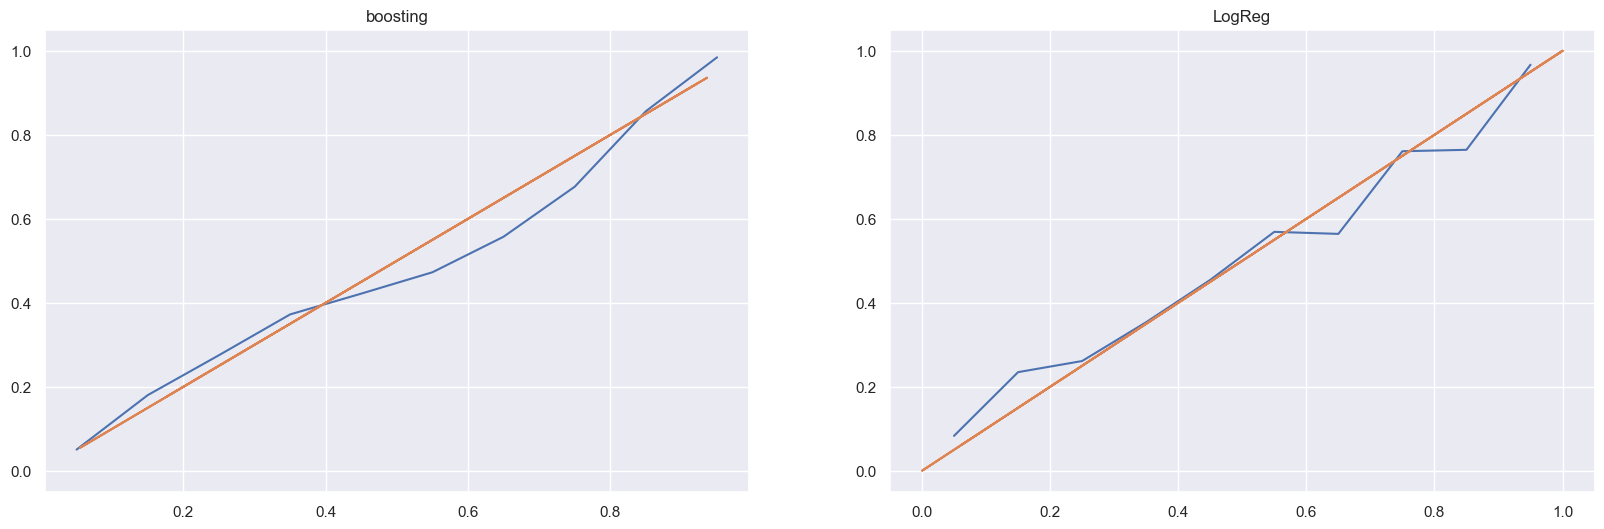

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

plot_calibration_curve(y_test, y_pred_boosting, ax[0])
plot_calibration_curve(y_test, y_pred_logreg, ax[1])
ax[0].plot(y_pred_boosting, y_pred_boosting, label = 'diag')
ax[1].plot(y_pred_logreg, y_pred_logreg, label = 'diag')

ax[0].set_title('boosting')
ax[1].set_title('LogReg')
plt.show()

Глядя на графики, видим что обе модели достаточно хорошо приближают вероятности, при этом по этому показателю очень похожи, однако график у бустинга более гладкий, наверное это хорошее свойство. 

### Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

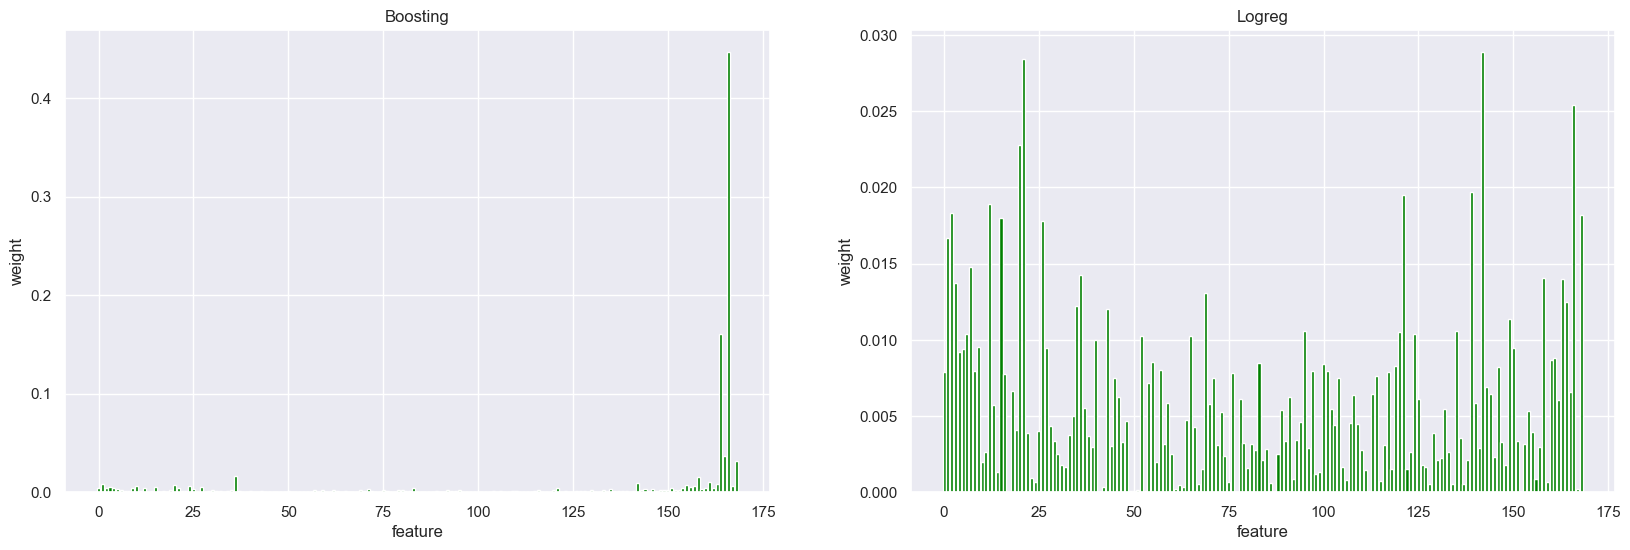

In [62]:
fig, axes = plt.subplots(figsize=(20, 6), ncols=2, nrows=1)


importances = boosting.feature_importances_
axes[0].bar(x=np.arange(x.shape[1]), height=importances, color='green')
axes[0].set_title('Boosting')
axes[0].set_xlabel('feature')
axes[0].set_ylabel('weight')

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
axes[1].bar(x=np.arange(x.shape[1]), height=np.abs(logreg.coef_.reshape(-1)) / np.sum(np.abs(logreg.coef_)) , color='green')
axes[1].set_title('Logreg')
axes[1].set_xlabel('feature')
axes[1].set_ylabel('weight')
plt.show()

Сравнивая эти графики, видим что для boosting не так много признаков имеют значимые веса, когда в logereg веса распределены в каком-то смысле равномерно. Наверное так происходит, потому что решающие деревья часто используют одни и те же признаки по которым разбивают выборку.

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

<BarContainer object of 169 artists>

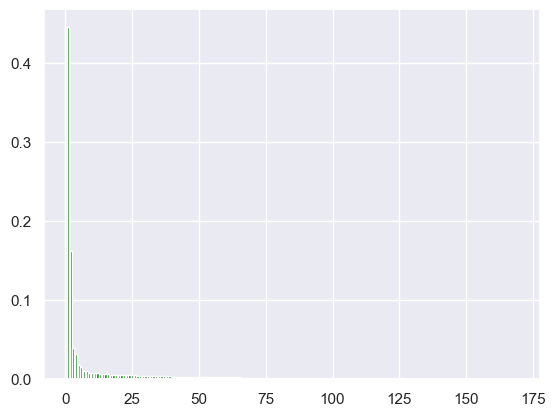

In [69]:
importances = sorted(boosting.feature_importances_)[::-1]
plt.bar(x=np.arange(1, 170), height=importances, color='green')

Видим, что веса признаков после 50-го по убыванию уже ничтожно малы, попробуем их выкинуть

In [70]:
min_weight = importances[50]
mask = (boosting.feature_importances_ >= min_weight)

boosting = Boosting(base_model_params = {'max_depth' : 11, 'min_samples_split' : 30, 'min_samples_leaf' : 2}, 
              learning_rate = 0.09313822625841761, n_estimators = 141)

boosting.fit(x_train[:, mask], y_train, x_valid[:, mask], y_valid)
boosting.score(x_valid[:, mask], y_valid)

0.9418561771600844

После фильтрации признаков, качество модели выросло: было 0.9392, стало 0.9418 (AUC-ROC на тесте)

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [71]:
boosting = Boosting(base_model_params = {'max_depth' : 11, 'min_samples_split' : 30, 'min_samples_leaf' : 2}, 
              learning_rate = 0.09313822625841761, n_estimators = 141)
boosting.fit(x_train, y_train, x_valid, y_valid)

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

x_boosting = boosting.decision_function(x_valid)
x_logreg = logreg.decision_function(x_valid)



meta_x = np.hstack((x_boosting.reshape(-1, 1), x_logreg.reshape(-1, 1)))
meta_y = y_valid

blending = LogisticRegression()
blending.fit(meta_x, meta_y)

LogisticRegression()

In [72]:
x_boosting_test = boosting.decision_function(x_test)
x_logreg_test = logreg.decision_function(x_test)
meta_x_test = np.hstack((x_boosting_test.reshape(-1, 1), x_logreg_test.reshape(-1, 1)))

In [74]:
def score(clf, x, y):
    return roc_auc_score(y == 1, clf.predict_proba(x)[:, 1])

In [81]:
print('blending score:', score(blending, meta_x_test, y_test))

blending score: 0.940796900757806


Получается что в помощью блендинга удалось немного улучшить модель, score по AUC-ROC вырос с 0.9392 до 0.9407

## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

Попробуем применить самую простую модель CatBoostClassifier, то есть не будем подбирать гиперпараметры. Посчитаем score такой модели

In [82]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(x_train, y_train)
print('catboost score:', score(cat, x_test, y_test))

Learning rate set to 0.036078
0:	learn: 0.6491456	total: 61.4ms	remaining: 1m 1s
1:	learn: 0.6106099	total: 65.1ms	remaining: 32.5s
2:	learn: 0.5804628	total: 68.9ms	remaining: 22.9s
3:	learn: 0.5522560	total: 72.7ms	remaining: 18.1s
4:	learn: 0.5262191	total: 76.7ms	remaining: 15.3s
5:	learn: 0.5008078	total: 81ms	remaining: 13.4s
6:	learn: 0.4812964	total: 85ms	remaining: 12.1s
7:	learn: 0.4620363	total: 89.2ms	remaining: 11.1s
8:	learn: 0.4461815	total: 92.9ms	remaining: 10.2s
9:	learn: 0.4303349	total: 96.7ms	remaining: 9.57s
10:	learn: 0.4142074	total: 100ms	remaining: 9.02s
11:	learn: 0.4011999	total: 104ms	remaining: 8.59s
12:	learn: 0.3907486	total: 108ms	remaining: 8.2s
13:	learn: 0.3808039	total: 112ms	remaining: 7.88s
14:	learn: 0.3710193	total: 116ms	remaining: 7.6s
15:	learn: 0.3641416	total: 120ms	remaining: 7.35s
16:	learn: 0.3554514	total: 123ms	remaining: 7.14s
17:	learn: 0.3492318	total: 128ms	remaining: 6.96s
18:	learn: 0.3419544	total: 131ms	remaining: 6.79s
19:	lea

Получился catboost_score: 0.9416, это немного лучше нашей реализации с подбором гиперпараметров, где score был 0.9392. Видимо в библиотеке CatBoost импелентированны более умные алгоритмы, что позволяет даже без подбора гиперпараметров опережать нашу модель.

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2024 года?